In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../src')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../scripts')))

In [3]:
from utils import *
from plottings import *

## Merging the Two data sets

In [4]:
df_store = data_loader('../../data/cleaned_store_data.csv')
df_sales = data_loader('../../data/train.csv')

c:\Store-Sales-Forecast-ML\scripts\utils.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


In [5]:
df = pd.merge(df_store, df_sales, on='Store')

In [6]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,1,2015-07-27,6102,612,1,1,0,1


In [7]:
# save merged data
df.to_csv('../../data/merged_data.csv', index=False)

In [8]:
column_summary(df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Store,int64,0,1017209,1115,"{1: 942, 726: 942, 708: 942, 709: 942, 713: 94..."
1,StoreType,object,0,1017209,4,"{'a': 551627, 'd': 312912, 'c': 136840, 'b': 1..."
2,Assortment,object,0,1017209,3,"{'a': 537445, 'c': 471470, 'b': 8294}"
3,CompetitionDistance,float64,0,1017209,655,"{250.0: 11120, 50.0: 7536, 350.0: 7536, 1200.0..."
4,CompetitionOpenSinceMonth,float64,0,1017209,12,"{9.0: 437602, 4.0: 87076, 11.0: 84455, 3.0: 63..."
5,CompetitionOpenSinceYear,float64,0,1017209,23,"{2013.0: 398774, 2012.0: 74299, 2014.0: 63732,..."
6,Promo2,int64,0,1017209,2,"{1: 509178, 0: 508031}"
7,Promo2SinceWeek,float64,0,1017209,25,"{0.0: 508031, 14.0: 72990, 40.0: 62598, 31.0: ..."
8,Promo2SinceYear,float64,0,1017209,8,"{0.0: 508031, 2011.0: 115056, 2013.0: 110464, ..."
9,PromoInterval,object,0,1017209,4,"{'No Promo': 508031, 'Jan,Apr,Jul,Oct': 293122..."


# Let's do the Analysis

## 1. Correlation between sales and the number of customers

In [9]:
np.corrcoef(df['Sales'], df['Customers'])

array([[1.        , 0.89471077],
       [0.89471077, 1.        ]])

Correlation coefficient between Sales and Customers: 0.8947


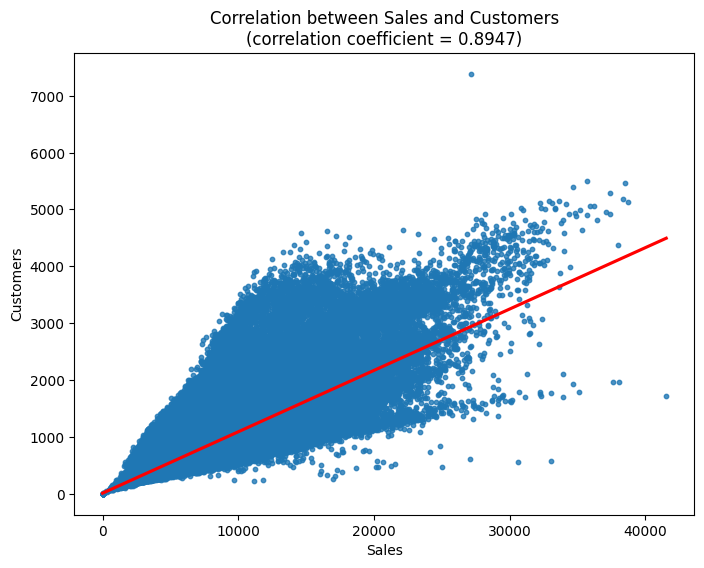

In [10]:
plot_correlation(df, 'Sales', 'Customers')

## Sales and Customers Comparison: Promo vs. No Promo

In [11]:
# Grouping data by 'Promo' and calculating the average sales
sales_by_promo = df.groupby('Promo')['Sales'].mean()

for promo, avg_sales in sales_by_promo.items():
    promo_status = "with Promotion" if promo == 1 else "without Promotion"
    print(f"Average Sales {promo_status}: {avg_sales:.2f}")

Average Sales without Promotion: 4406.05
Average Sales with Promotion: 7991.15


In [14]:
# Grouping data by 'Promo' and calculating the average number of customers
customers_by_promo = df.groupby('Promo')['Customers'].mean()

for promo, avg_customers in customers_by_promo.items():
    promo_status = "with Promotion" if promo == 1 else "without Promotion"
    print(f"Average Number of Customers {promo_status}: {avg_customers:.2f}")

Average Number of Customers without Promotion: 517.82
Average Number of Customers with Promotion: 820.10


### Visualizations

c:\Store-Sales-Forecast-ML\scripts\plottings.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales', data=sales_by_promo, palette='Blues')


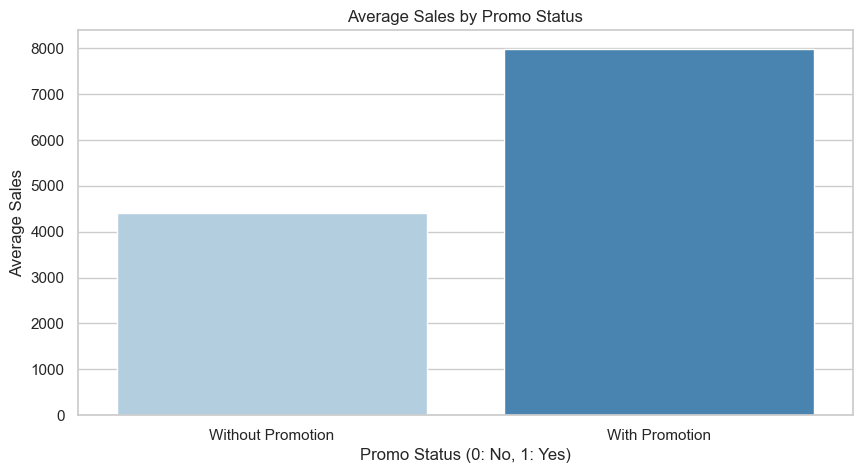

c:\Store-Sales-Forecast-ML\scripts\plottings.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Customers', data=customers_by_promo, palette='Greens')


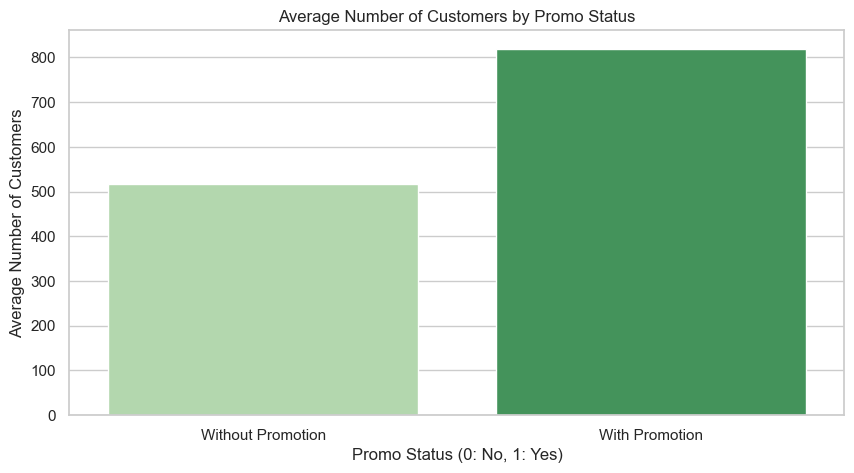

c:\Store-Sales-Forecast-ML\scripts\plottings.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Sales_per_Customer', data=sales_per_customer_by_promo, palette='Reds')


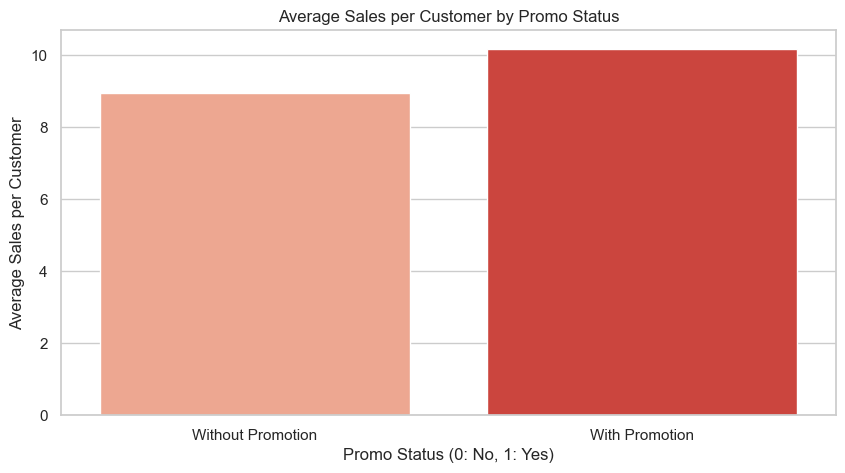

In [12]:
visualize_promo_effects(df)